Our dataset is the covtype dataset.

This is the link to download the daset: https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/

Overall description:
- m X n = 581,012 X 55
Key features including: Elevation, Aspect, Slope etc.
The last column is the cover_type classification from 1 to 7.


#1. Import the input_path fot the dataset as csv file and necessary library

In [1]:
import os
import time
#Please fill in the input folder path and the output folder path
input_path = '/Users/phupham/Desktop/UniSyd/Semester3/MachineLearning/Assignment2/covtype.csv'
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


/Users/phupham/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#2. Read the value into attr_value for X and cat for Y and preliminary visualization of the data


In [2]:
df = pd.read_csv(input_path,header = None )
df.shape
attr_value = df.iloc[:,0:53].values
cat = df[54].values

(581012, 55)

#3. Split the data 80% for training and 20% for testing and Preprocessing

In [4]:
Trainset,Testset,Trainset_cat, Testset_cat = train_test_split(attr_value, cat,test_size=0.2, random_state=0)

In [5]:
# Small data set for preprocessing test
X_train, X_test, y_train, y_test = train_test_split(Trainset, Trainset_cat, test_size=0.5, random_state=0)

#3A. Preprocessing with PCA. Below is for testing of the preprocesing

In [7]:
'''
#Apply PCA to decrease the dimension of the dataset
pca = PCA(n_components=5)
newtraining = pca.fit_transform(X_train)
newtest = pca.transform(X_test)
start_time = time.time()
neigh = KNeighborsClassifier(n_neighbors =1,algorithm='kd_tree')
neigh.fit(newtraining,y_train)
pred = neigh.predict(newtest)
print("Processing time is %s seconds" % (time.time() - start_time))
a = accuracy_score(y_test, pred)
print("Accuracy is %0.5f "%a)
'''


Processing time is 3.619994878768921 seconds
Accuracy is 0.94701 


#3B. Preprocessing with Variance Feature Selection

In [13]:
'''
#Apply Variance Feature Selection
selector = VarianceThreshold(threshold = 0.1)
newtraining = selector.fit_transform(X_train)
newtest = selector.fit_transform(X_test)
start_time = time.time()
neigh = KNeighborsClassifier(n_neighbors =1,algorithm='kd_tree')
neigh.fit(newtraining,y_train)
pred = neigh.predict(newtest)
print("Processing time is %s seconds" % (time.time() - start_time))
a = accuracy_score(y_test, pred)
print("Accuracy is %0.5f "%a)
'''

Processing time is 6.361757040023804 seconds
Accuracy is 0.95658 


APPLY VARIANCE FEATURE SELECTION AS CONSISTENT WITH OTHER METHODS

#4. 10fold-Cross-validation and apply KNN

In [20]:
selector = VarianceThreshold(threshold = 0.1)
newtraining = selector.fit_transform(Trainset)
newtest = selector.fit_transform(Testset)

In [13]:
'''
#This may take a few minutes to run
# Test the appropriate number of k
cv_acc =[]

k_group = [1,3,5,13,15,21]
for k in k_group:
    neigh = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree' )
    start_time = time.time()
    score = cross_val_score(neigh,newtraining,Trainset_cat, cv=3, scoring='accuracy')
    cv_acc.append(score.mean())
print(cv_acc)
'''

In [21]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(Trainset,Trainset_cat)
print(skf)

n=0
acc=[]
process=[]

for train_index,test_index in skf.split(newtraining,Trainset_cat):
    X_train, X_test = newtraining[train_index], newtraining[test_index]
    y_train, y_test = Trainset_cat[train_index], Trainset_cat[test_index]
    start_time = time.time()
    neigh = KNeighborsClassifier(n_neighbors =3,algorithm='kd_tree')
    neigh.fit(X_train,y_train)
    pred = neigh.predict(X_test)
    t = time.time() - start_time
    print("Processing time is %s seconds" % t)
    a = accuracy_score(y_test, pred)
    print("Accuracy for %d fold is %0.5f "%(n, a))
    n= n+1
    acc.append(a)
    process.append(t)
    

Processing time is 3.100414991378784 seconds
Accuracy for 0 fold is 0.96799 
Processing time is 2.786444902420044 seconds
Accuracy for 1 fold is 0.96648 
Processing time is 2.910871744155884 seconds
Accuracy for 2 fold is 0.96743 
Processing time is 2.9090850353240967 seconds
Accuracy for 3 fold is 0.96812 
Processing time is 3.82912278175354 seconds
Accuracy for 4 fold is 0.96685 
Processing time is 3.389090061187744 seconds
Accuracy for 5 fold is 0.96781 
Processing time is 3.58927583694458 seconds
Accuracy for 6 fold is 0.96818 
Processing time is 3.0815889835357666 seconds
Accuracy for 7 fold is 0.96725 
Processing time is 3.61145281791687 seconds
Accuracy for 8 fold is 0.96603 
Processing time is 3.541551113128662 seconds
Accuracy for 9 fold is 0.96684 


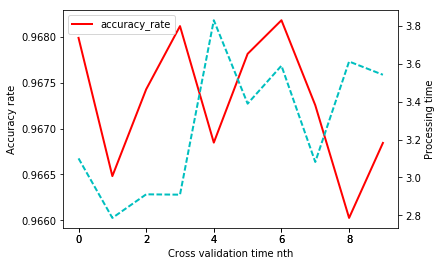

In [23]:
'''
fig1 =plt.figure()
ax1 = fig1.add_subplot(111)

line1 = ax1.plot(acc, 'r',label = "accuracy_rate",linewidth = 2,  )
ax1.set_ylabel("Accuracy rate")

ax2 =fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(process, 'c--', label = "processing_time", linewidth = 2, linestyle = '--' )
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel("Processing time")
ax1.set_xlabel("Cross validation time nth")
#legend((line1, line2), ("accuracy_rate", "processing_time"))
#show()

ax1.legend(loc=0)
'''

#5. Apply the model to the Testset

In [24]:
neigh = KNeighborsClassifier(n_neighbors =3,algorithm='kd_tree')
neigh.fit(newtraining, Trainset_cat)
pred = neigh.predict(newtest)
a = accuracy_score(Testset_cat, pred)
print(a)


0.968959493301


In [25]:
report = metrics.classification_report(Testset_cat,pred)
print(report)

             precision    recall  f1-score   support

          1       0.97      0.97      0.97     42212
          2       0.97      0.98      0.97     56849
          3       0.96      0.97      0.96      7094
          4       0.91      0.79      0.85       569
          5       0.91      0.89      0.90      1886
          6       0.94      0.94      0.94      3502
          7       0.97      0.97      0.97      4091

avg / total       0.97      0.97      0.97    116203



In [26]:
#Table of the confusion matrix
y_true = pd.Series(Testset_cat)
y_pred = pd.Series(pred)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,4,5,6,7,All
True,,,,,,,,
1,40931,1171,0,0,12,3,95,42212
2,1129,55428,77,0,138,60,17,56849
3,1,108,6848,29,10,98,0,7094
4,0,1,87,452,0,29,0,569
5,24,175,10,0,1672,5,0,1886
6,5,73,109,18,5,3292,0,3502
7,99,19,0,0,0,0,3973,4091
All,42189,56975,7131,499,1837,3487,4085,116203


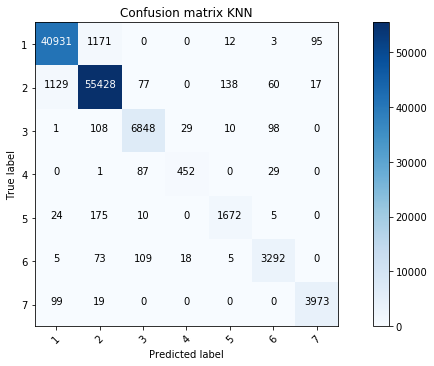

In [38]:
'''
confusion = metrics.confusion_matrix(Testset_cat,pred)
target_name = ['1','2','3','4','5','6','7']
def plot_cmatrix(cm,classes,title= 'Confusion matrix for Covtype',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
np.set_printoptions(precision=2)
plt.figure(figsize=(10, 5))
plot_cmatrix(confusion, classes=target_name,title='Confusion matrix KNN')
plt.show()
'''   

In [31]:
#This may take a minute to run
classifier = OneVsRestClassifier(neigh)
predicted_prob = classifier.fit(newtraining, Trainset_cat).predict_proba(newtest)

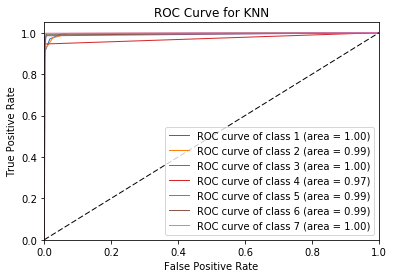

In [37]:
accurate_y = label_binarize(Testset_cat, classes=[1,2,3,4,5,6,7])
n_classes = accurate_y.shape[1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range (n_classes):
    fpr[i], tpr[i], _ = roc_curve(accurate_y[:,i], predicted_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=1
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc="lower right")
plt.show()

